In [5]:
import pandas as pd
import numpy as np
from Correlation import *
from Plots import init_plotting

init_plotting()

In [6]:
df = pd.read_csv("processed_data/PUE.csv")
df

,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,...,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm,logYM
0,-0.282081,-0.458469,-1.149486,-0.446448,2,2,-1.236622,-0.293492,0.242956,-0.326584,...,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911,1.568202
1,-0.217934,-0.458469,-1.149486,-0.446448,2,2,-1.236622,-0.293492,0.242956,-0.306909,...,0.357317,-0.557772,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137,1.494155
2,0.340149,-0.458469,0.257284,0.423239,2,4,1.002082,0.121854,-0.229586,-0.521730,...,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039,1.306425
3,0.981623,-0.458469,0.257284,0.423239,2,4,1.002082,0.121854,-0.229586,-0.877993,...,-0.123056,0.204080,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842,1.892039
4,0.340149,-0.458469,0.546134,0.423239,2,4,1.002082,0.121854,-0.229586,-0.843088,...,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042,1.949585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2,2,-1.236622,0.308492,-0.699793,-0.898871,...,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016,1.887449
322,0.666017,-0.458469,-0.039636,-0.577991,2,2,0.754154,0.627557,-0.699793,-0.672609,...,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.952921,-0.399617,0.697667,0.434875,2.207634
323,-0.586782,1.926609,-0.039636,-0.577991,2,2,0.551581,-0.612557,0.242956,0.189869,...,0.079673,0.833987,0.875190,0.177717,-0.651873,-1.206811,-0.174683,0.287152,0.569582,0.810904
324,-0.464901,1.926609,-0.039636,-0.577991,2,2,0.551581,-0.612557,0.242956,0.103863,...,0.042658,0.833987,0.875190,0.194281,-0.651873,-1.206811,-0.193522,0.207951,0.625250,0.845718


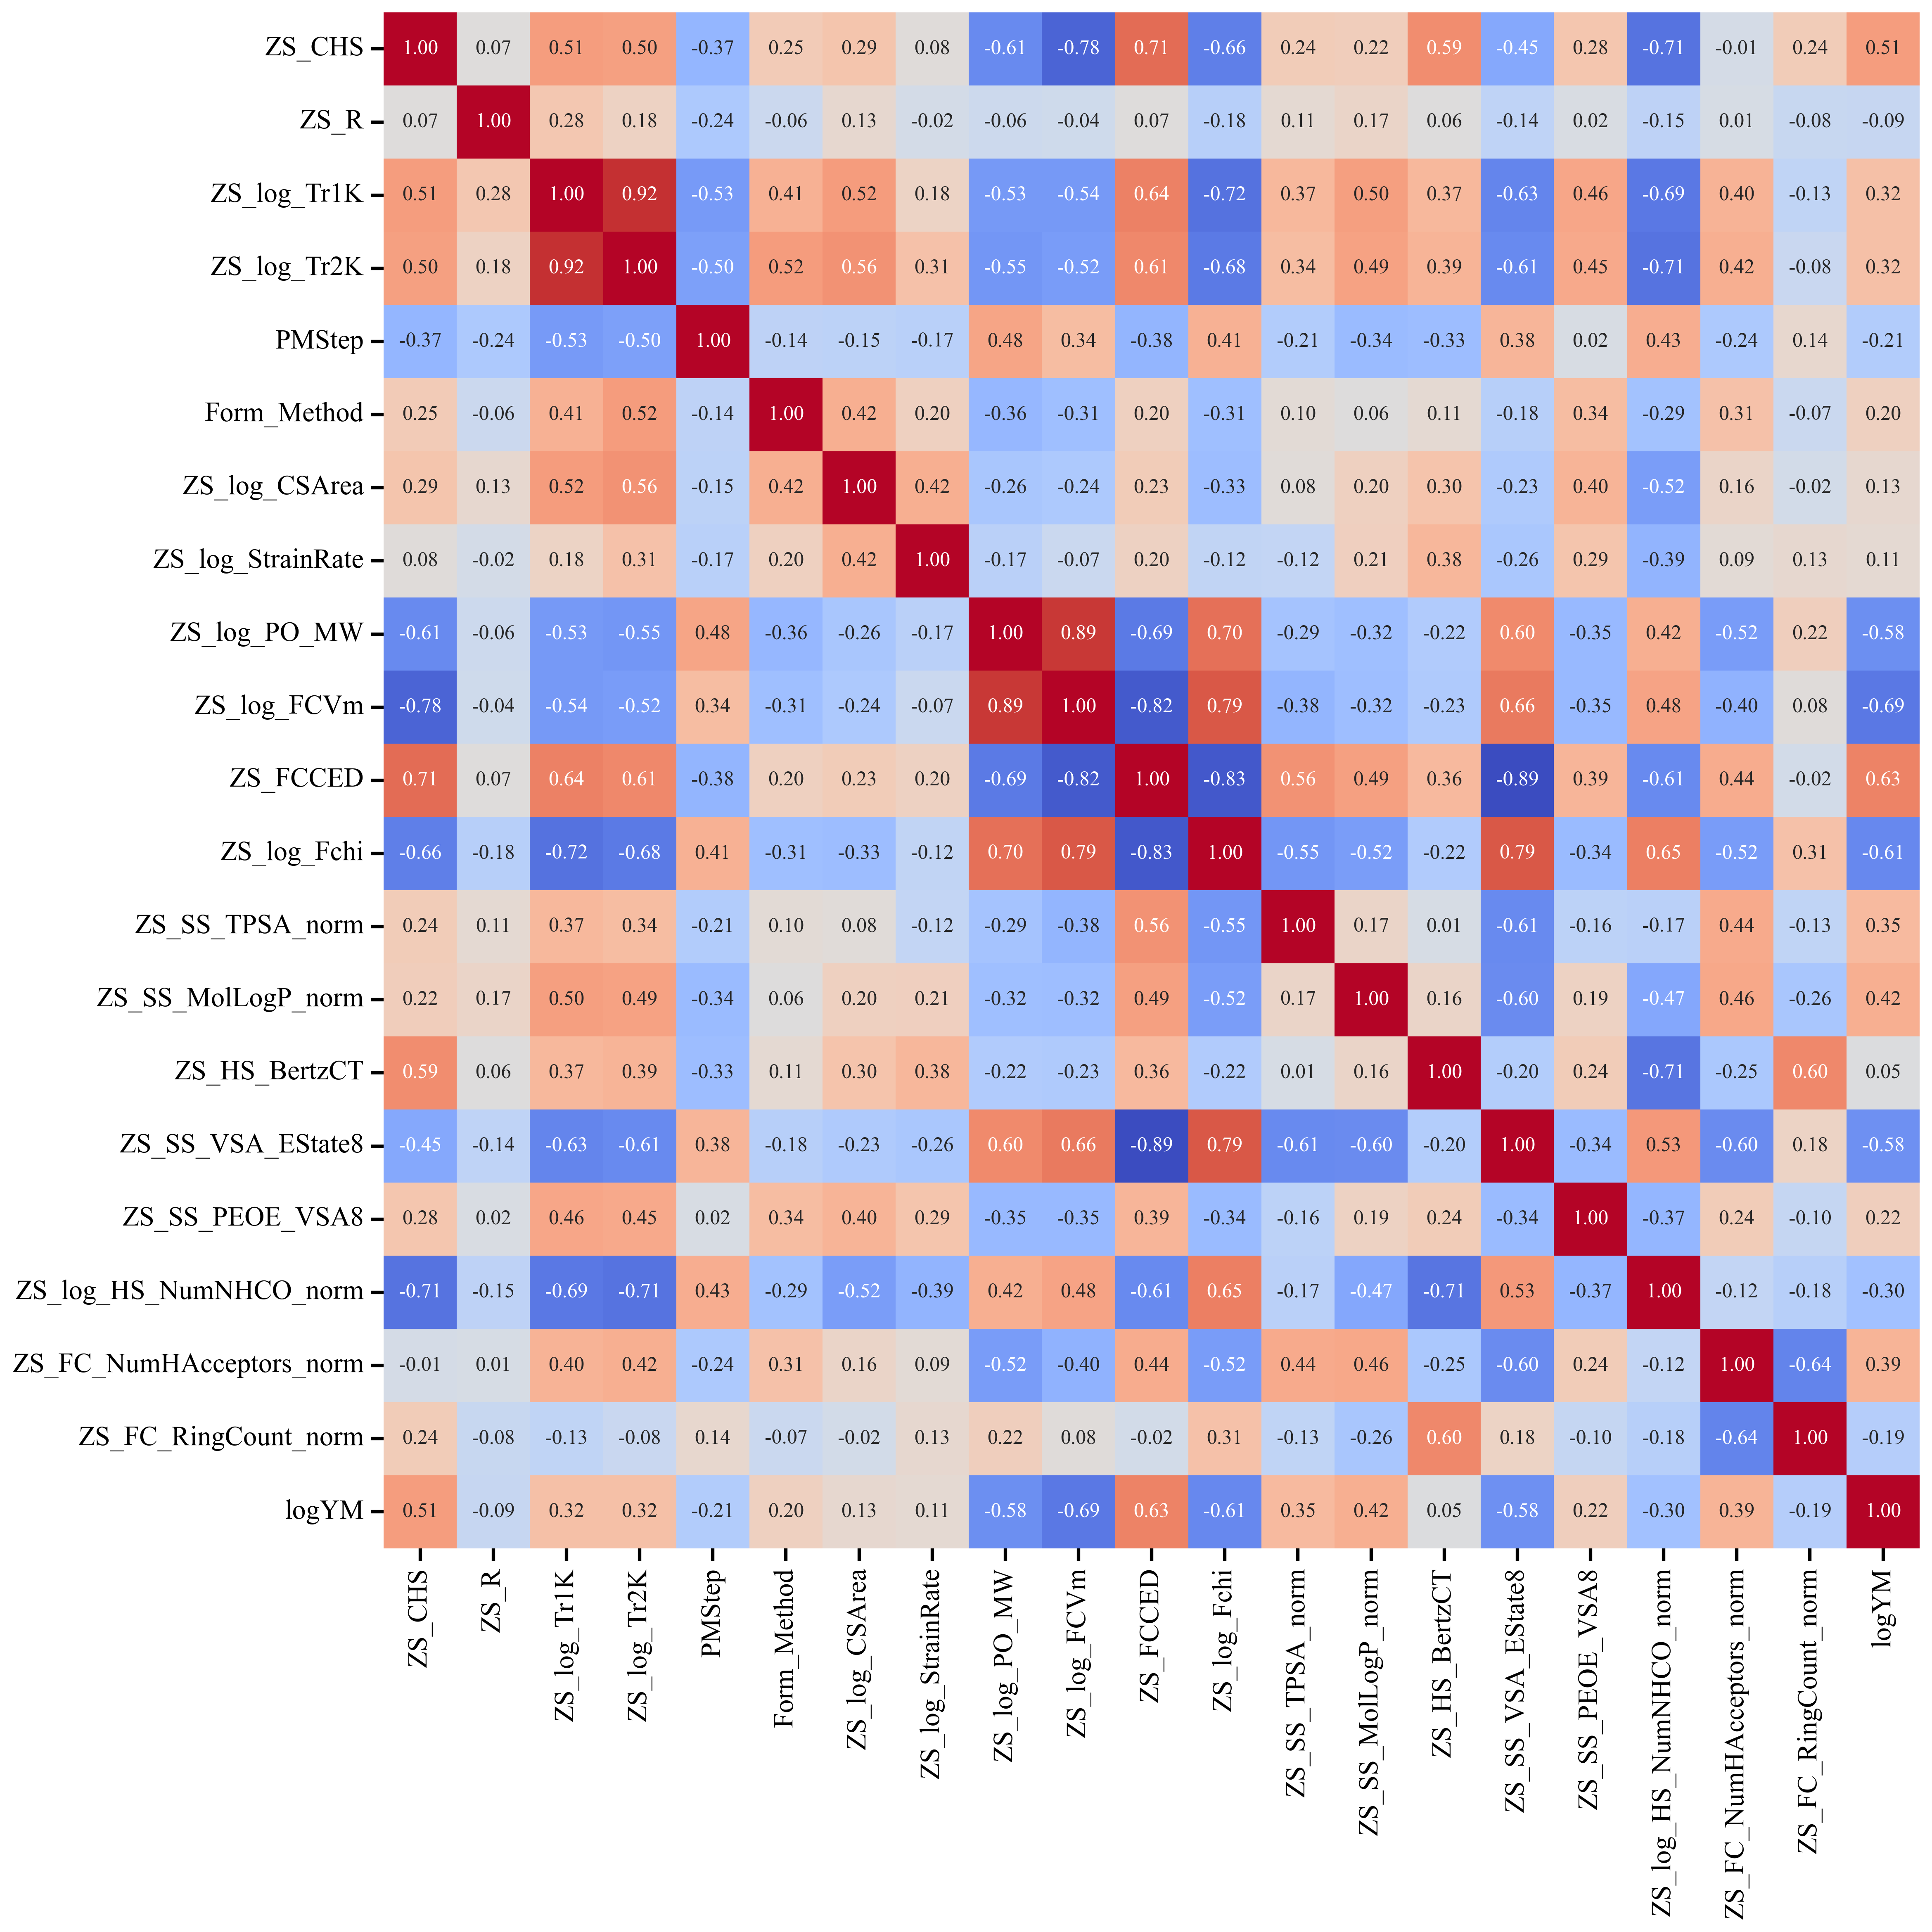

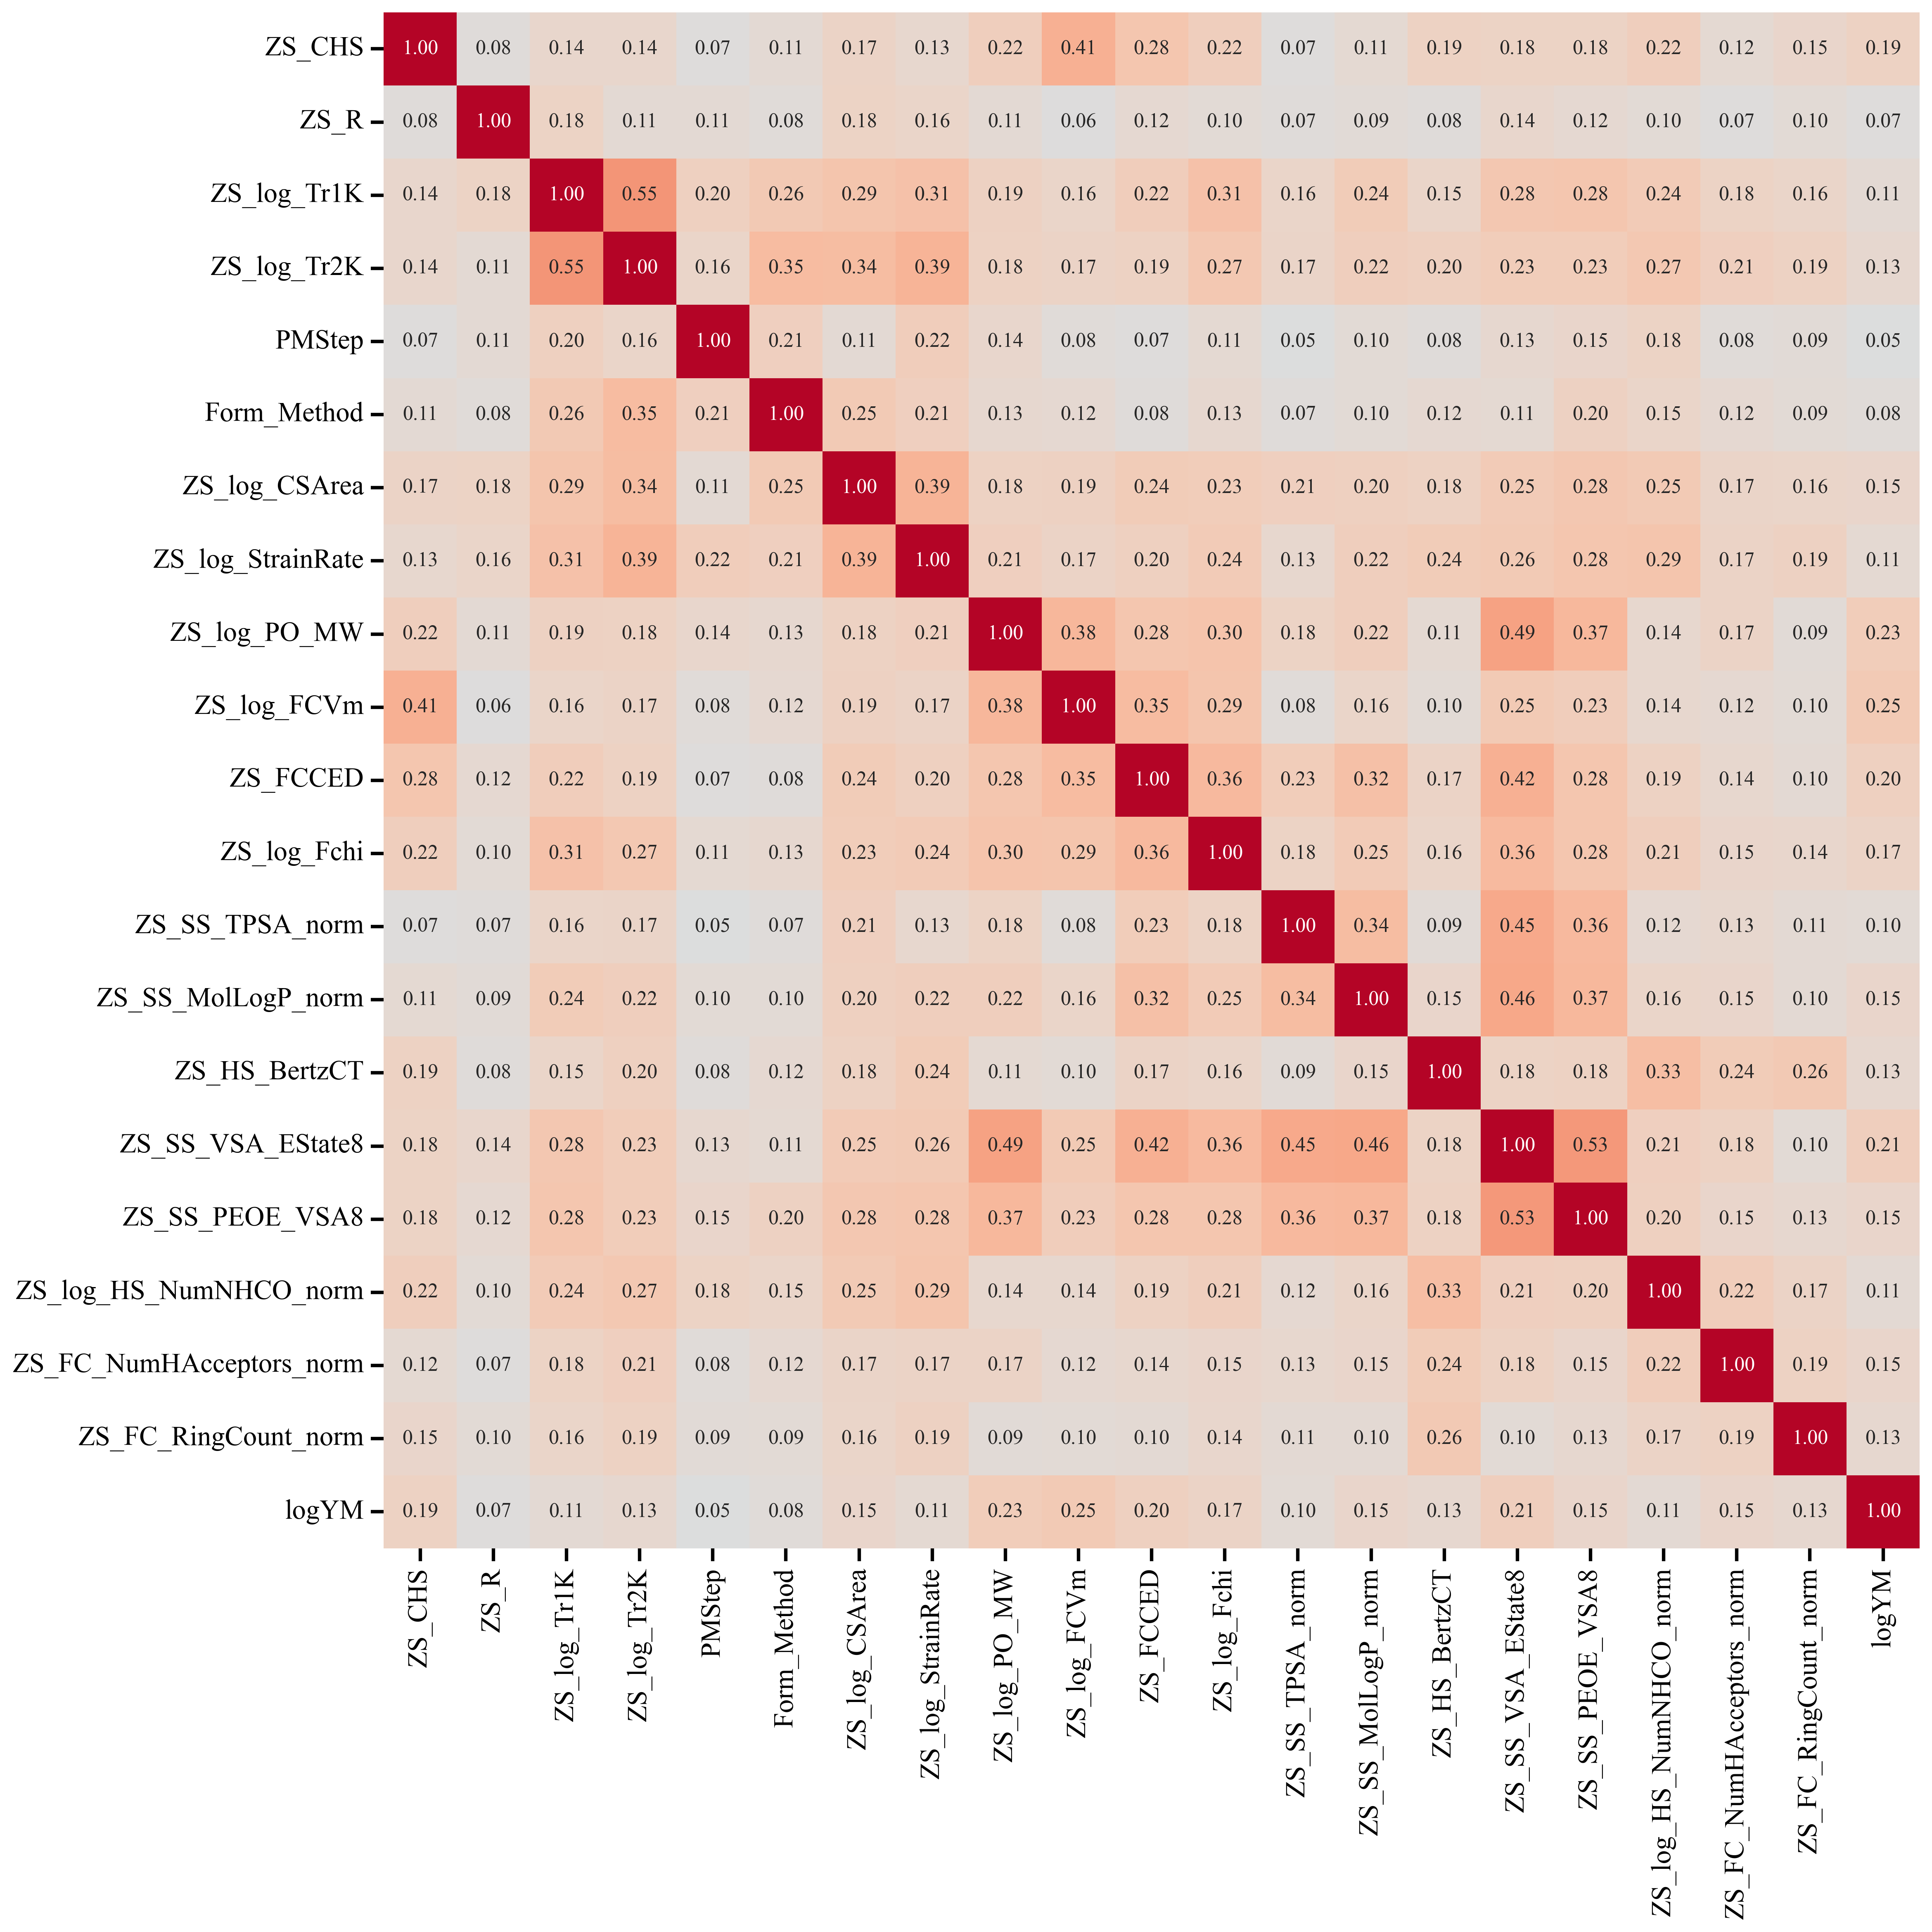

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关系数
corr = df.corr()

# 第一个 heatmap
fig1, ax1 = plt.subplots(figsize=(16, 16))
hm1 = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=False, ax=ax1)

# 获取colorbar对象
cbar = hm1.collections[0].colorbar
vmin, vmax = hm1.collections[0].get_clim()   # 颜色范围

plt.savefig("plots/PUE_pearson_heatmap.png", dpi=300, bbox_inches="tight")

# 第二个 heatmap
df_corr = mutual_info_matrix(df)

fig2, ax2 = plt.subplots(figsize=(16, 16))
hm2 = sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True,
                  cbar=False, ax=ax2, vmin=vmin, vmax=vmax)

# # 单独加 colorbar，并去掉黑色边框
# cbar2 = fig2.colorbar(hm2.collections[0], ax=ax2)
# cbar2.outline.set_visible(False)
plt.savefig("plots/PUE_mi_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()
